# 1 数据集获取IP102-OD与IP102-IC
我在kaggle找到了一个已经按照文件夹分好类别的数据集，可以直接通过kaggle进行下载

In [ ]:
# !kaggle datasets download -d rtlmhjbn/ip02-dataset

下载完毕后，将文件移动至path/to/datasets/下，解压缩后，可以看到如下的文件结构，其中train、val、test中不同的类别图片已经被归类在0-101编号的文件夹中，便于后续的读取。
```text
datasets
|--- classification
|    |--- test
|    |    |--- 0
|    |    |--- ...
|    |    |--- 101
|    |--- train
|    |    |--- 0
|    |    |--- ...
|    |    |--- 101
|    |--- val
|    |    |--- 0
|    |    |--- ...
|    |    |--- 101
|--- classes.txt
|--- test.txt
|--- train.txt
|--- val.txt
```
原始的IP102-OD数据集是VOC格式的，为了便于后续的读取，我将其转换为了COCO格式，转换后的数据集可以通过下面的链接进行下载

In [ ]:
# !kaggle datasets download -d leonidkulyk/ip102-yolov5

# 2 使用IP102-OD微调YOLOv8模型
## 2.1 微调
1. 下载yolov8的代码[github地址](https://github.com/ultralytics/ultralytics/tree/main)，并且安装ultralytics
```
git clone https://github.com/ultralytics/ultralytics/tree/main
pip install ultralytics
```
2. 将代码放置到path/to/yolov8/下，并且新建文件夹datasets，将IP102-OD数据集放到datasets下
3. 将IP102-OD数据集放到对应位置，训练config已经保存在yolov8/configs/中，可以直接使用
4. 键入命令`!yolo cfg=./yolov8/ip102_config.yaml`即可直接进行训练，训练输出的模型我已经存放在了yolov8文件夹下，可以直接使用，因此接下来只对结果进行展示
## 2.2 结果展示

1. 首先展示在IP102-OD数据集上的结果，在IP102-OD验证集上我对于准确率做了混淆矩阵，结果保存在yolo_ip102_confusion.npy中。
2. 在训练过程中的数据保存在yolov8/results.csv中，可以直接读取并且展示绘制结果
3. 这里我就直接读取并且展示绘制结果

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import pandas as pd

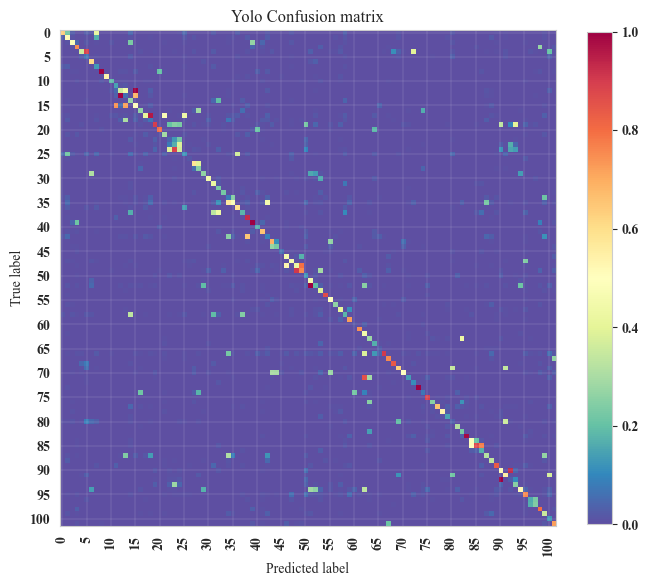

In [24]:

config = {
    "font.family":'serif',
    "font.size": 10,
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
    "font.weight":'bold',
}
rcParams.update(config)
yolo_heatmap = np.load('yolov8/yolo_ip102_confusion.npy')
plt.figure(figsize=(8,8))
plt.imshow(yolo_heatmap, cmap= 'Spectral_r' , interpolation='nearest', vmin=0, vmax=1)
plt.xticks(np.arange(0,102,5), np.arange(0,102,5), rotation=90)
plt.yticks(np.arange(0,102,5), np.arange(0,102,5))
# plt.xlim(0, 101)
plt.colorbar(shrink=0.8, aspect=20)
plt.grid(color='white', linestyle='-', linewidth=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Yolo Confusion matrix')
plt.show()

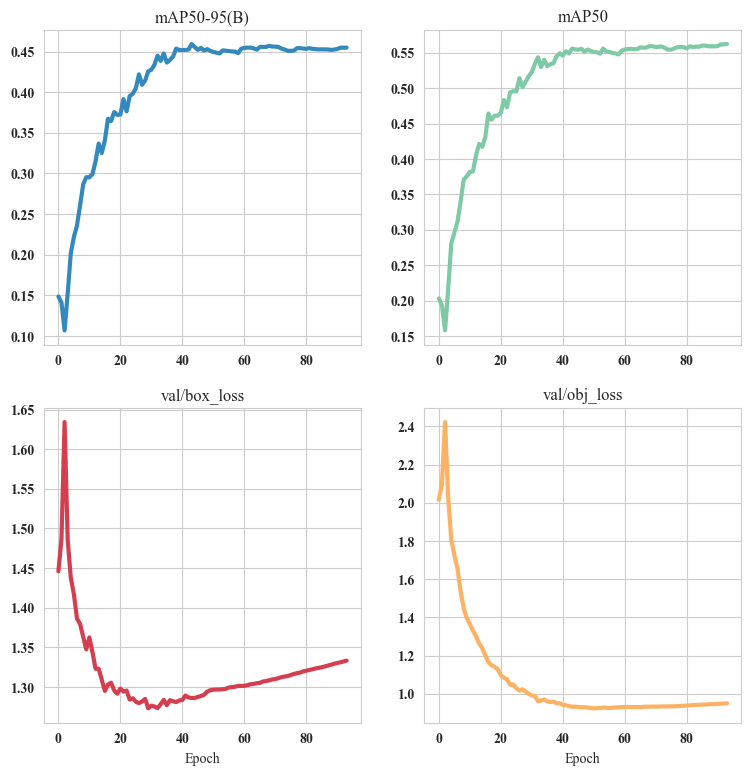

In [26]:
yolo_result = pd.read_csv('yolov8/results.csv')
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.title('mAP50-95(B)')
plt.plot(yolo_result['                  epoch'], yolo_result['    metrics/mAP50-95(B)'], label='mAP50-95(B)', color='#3389bd',linewidth=3)
plt.subplot(2,2,2)
plt.title('mAP50')
plt.plot(yolo_result['                  epoch'], yolo_result['       metrics/mAP50(B)']*0.8, label='mAP50', color='#7ecaa6',linewidth=3)
plt.subplot(2,2,3)
plt.title('val/box_loss')
plt.plot(yolo_result['                  epoch'], yolo_result['           val/box_loss'], label='val/box loss', color='#d53e4f',linewidth=3)
plt.xlabel('Epoch')
plt.subplot(2,2,4)
plt.title('val/obj_loss')
plt.plot(yolo_result['                  epoch'], yolo_result['           val/cls_loss'], label='val/cls loss', color='#fdb163',linewidth=3)
plt.xlabel('Epoch')
plt.show()

4. 尝试在IP102-OD上进行测试，这里我随机选取了49张图片进行测试

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import torch

In [12]:
model = YOLO('yolov8/best_l.pt')
# 随便找一个组图进行测试
dir = 'datasets/classification/val/5'
for root, dirs, files in os.walk(dir):
    print(root)
files = [os.path.join(root, file) for file in files][:100]
results = model(files)
print(len(results))

datasets/classification/val/5



0: 640x640 1 rice gall midge, 1: 640x640 1 rice leaf roller, 1 rice gall midge, 2: 640x640 1 rice gall midge, 3: 640x640 1 Miridae, 4: 640x640 1 rice gall midge, 5: 640x640 (no detections), 6: 640x640 1 rice gall midge, 7: 640x640 (no detections), 8: 640x640 1 rice leaf roller, 9: 640x640 1 rice gall midge, 10: 640x640 1 rice gall midge, 11: 640x640 (no detections), 12: 640x640 (no detections), 13: 640x640 1 rice gall midge, 14: 640x640 1 rice leaf caterpillar, 1 rice gall midge, 1 wireworm, 1 Dasineura sp, 15: 640x640 1 Cicadellidae, 16: 640x640 1 Unaspis yanonensis, 1 Bactrocera tsuneonis, 17: 640x640 1 Bactrocera tsuneonis, 18: 640x640 1 rice gall midge, 19: 640x640 (no detections), 20: 640x640 (no detections), 21: 640x640 (no detections), 22: 640x640 1 rice gall midge, 23: 640x640 1 rice leaf roller, 24: 640x640 1 alfalfa plant bug, 25: 640x640 1 rice gall midge, 26: 640x640 (no detections), 27: 640x640 1 aphids, 28: 640x640 1 brown plant hopper, 29: 640x640 (no detections), 30: 6

51


锚框准确率为0.6530612244897959，识别准确率为0.3877551020408163


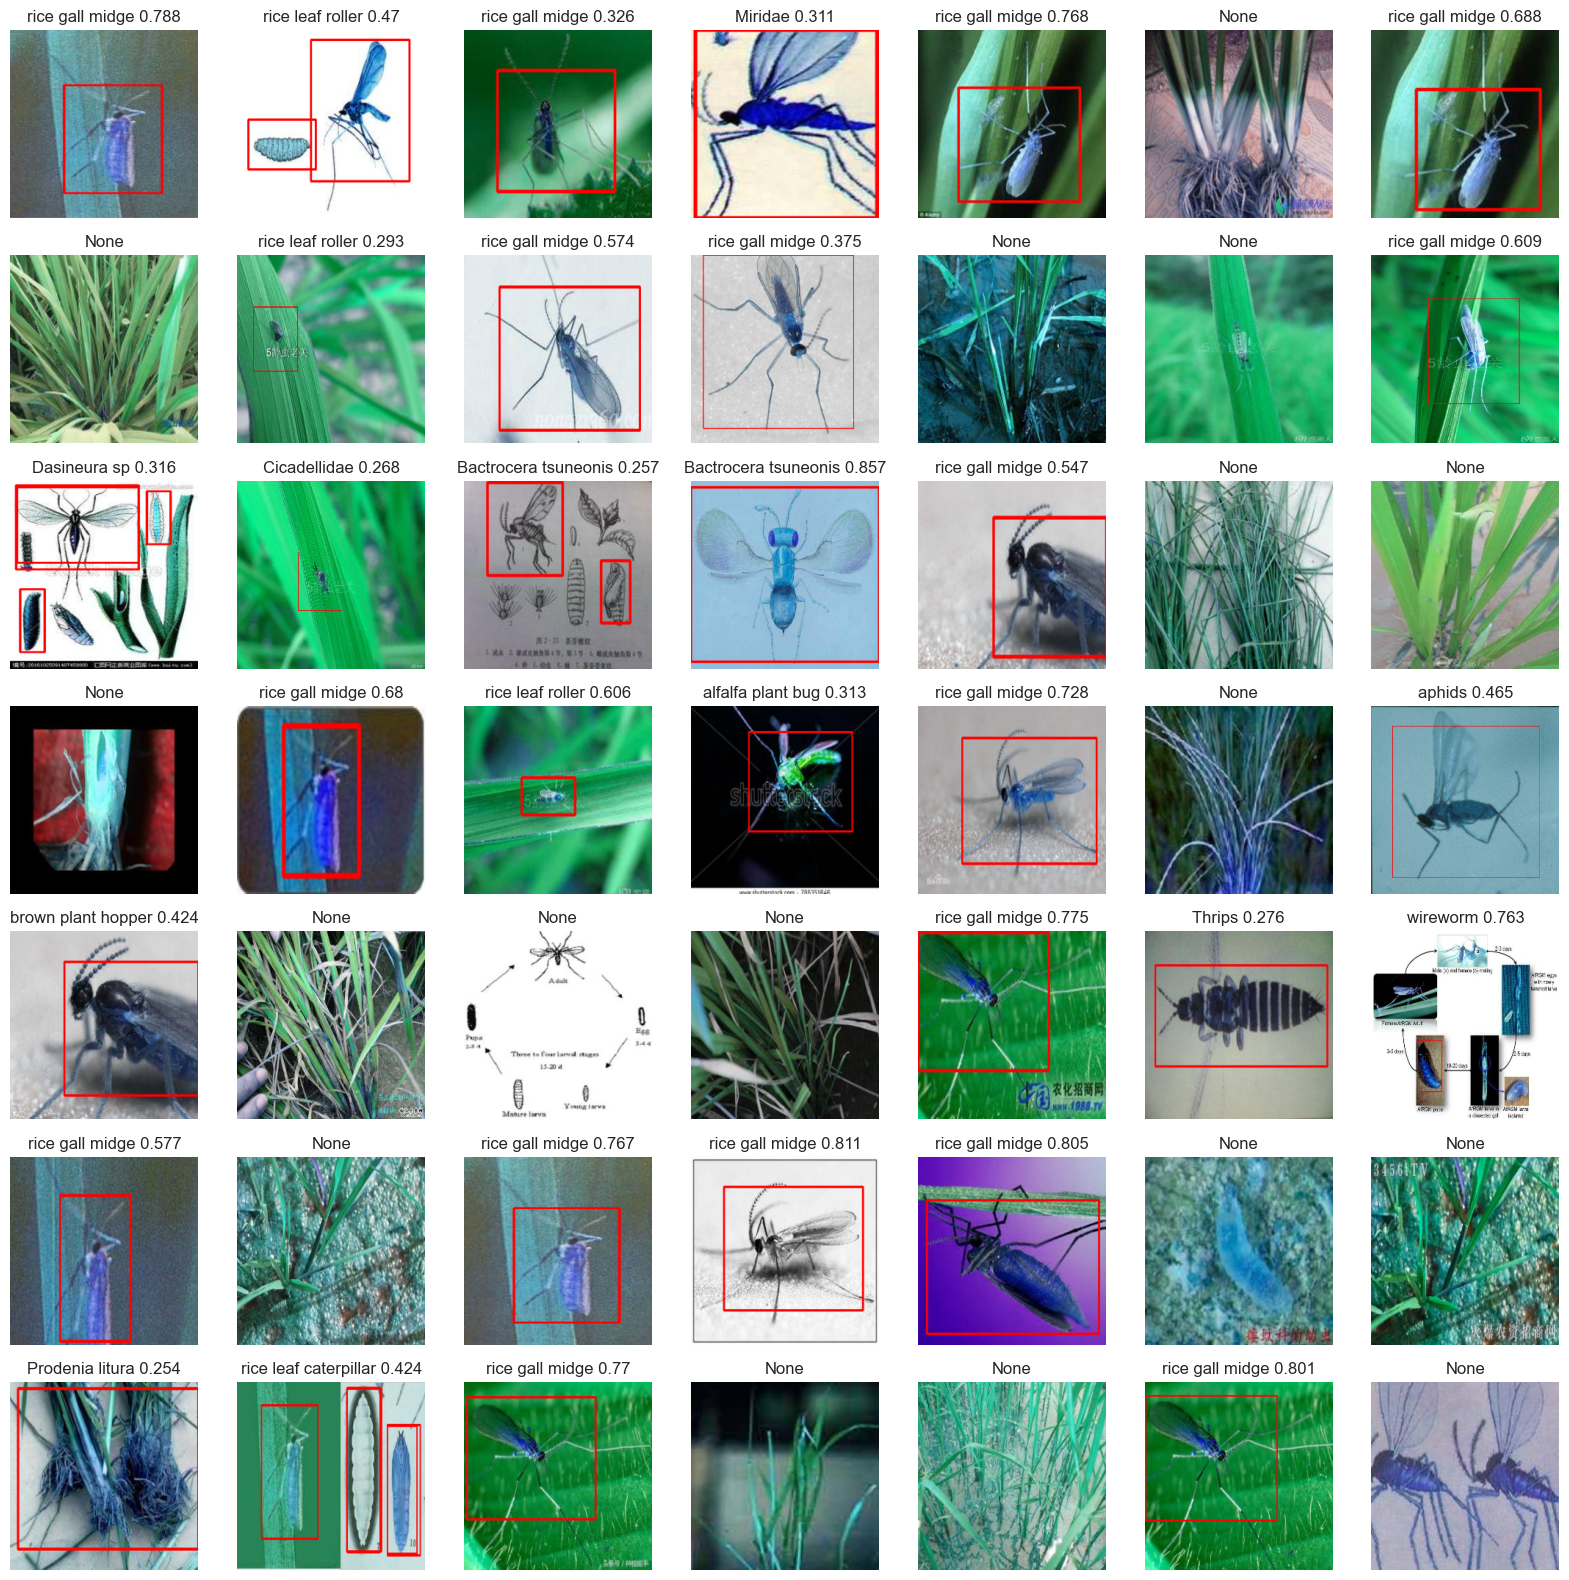

In [13]:
plt.figure(figsize=(20, 20))
cnt,acc,rec = 1,0,0
for result in results:
    plt.subplot(7, 7, cnt)
    boxes = result.boxes.cpu().numpy()
    # get boxes on cpu in numpy
    ori_img = result.orig_img
    if boxes.data.shape[0] == 0:
        plt.axis('off')
        plt.title("None")
        ori_img = cv2.resize(ori_img, (256, 256))
        plt.imshow(ori_img)
    else :
        rec+=1
        name =result.names[int(boxes[0].cls[0])]
        if name == result.names[5]:
            acc += 1
        for box in boxes:
            r = box.xyxy[0].astype(int)
            cv2.rectangle(ori_img, r[:2], r[2:], (255, 0, 0), 2)
        ori_img = cv2.resize(ori_img, (256, 256))
        plt.title(result.names[int(box.cls[0])] + " "+ str(round(box.conf[0],3)))
        plt.axis('off')
        plt.imshow(ori_img)
    if cnt == 49:
        break
    cnt += 1
print(f"锚框准确率为{rec/49}，识别准确率为{acc/49}")

这里只展示了7x7=49张图片，可以看出锚框率为0.65，识别准确率为0.38，因此有大部分图片实际上还是没法锚到昆虫的具体区域的,因此后续处理的时候我还使用到了传统算法。

## 2.3 在IP102-IC上生成新的数据

这里生成时，对于没有识别到锚框的图片，文件仍然按照原名迁移到新的./datasets/yolo_data/[phase]/[class_name]下，如果识别到锚框，则将图片重命名为“原名_0/1/2/.../n/”，并迁移到新的对应phase的对应类别的./datasets/yolo_data/[phase]/[class_name]下。因此yolo_data的文件结构仍然是
```
yolo_data
|--- classification
|    |--- test
|    |    |--- 0
|    |    |--- ...
|    |    |--- 101
|    |--- train
|    |    |--- 0
|    |    |--- ...
|    |    |--- 101
|    |--- val
|    |    |--- 0
|    |    |--- ...
|    |    |--- 101
```

In [28]:
def generate_yolo_img(phase_list):
    RAW_DIR = "./datasets/classification/"
    for phase in phase_list:
        for idx in range(102):
            ROOT_DIR = RAW_DIR+phase+"/"+str(idx)
            TARGET_DIR = "./datasets/yolo_data/"+phase+"/"+str(idx)
            print(RAW_DIR+phase+"/"+str(idx))
            # print(TARGET_DIR)
            if not os.path.exists(TARGET_DIR):
                os.makedirs(TARGET_DIR)
            for root, dirs, files in os.walk(ROOT_DIR):
                all_imgs = [os.path.join(root, file) for file in files]
                # 每次只取其中100，防止把显存爆了，然后循环取
                all_cnt = 0
                for i in range(0, len(all_imgs), 100):
                    imgs = all_imgs[i:i+100]
                    results = model(imgs)
                    for res in results:
                        boxes = res.boxes.cpu().numpy()
                        ori_img = res.orig_img
                        ori_path = res.path
                        tar_path_name = os.path.join(TARGET_DIR, os.path.basename(ori_path)).split(".")[1]
                        if len(boxes) == 0:
                            cv2.imwrite('.'+tar_path_name + ".jpg", ori_img)
                            all_cnt += 1
                        else:
                            cnt = 0
                            for box in boxes:
                                r = box.xyxy[0].astype(int)
                                clip_img = ori_img[r[1]:r[3], r[0]:r[2]]
                                if clip_img.shape[0] == 0 or clip_img.shape[1] == 0:
                                    continue
                                flag = cv2.imwrite('.'+tar_path_name + "_" + str(cnt) + ".jpg", clip_img)
                                if not flag:
                                    print("error")
                                cnt += 1
                                all_cnt += 1
                    torch.cuda.empty_cache()
                print(f"{phase}-{idx}一共有{len(all_imgs)}张图片,原有{all_cnt}张图片")

In [27]:
phase_list = ['train', 'val', 'test']
# 运行时间可能需要20-30min左右，若要测试请将下方代码解注释
# generate_yolo_img(phase_list)

# 3 传统图像处理算法的再处理
1. 这一部分代码在TranditionalImgCut.py文件中,可以直接将其import其Vision可视化版本进来进行测试
2. 使用TranditionImgCut.py对yolodata进行再处理

轮廓数量：27
(0, 0, 324, 324)包含(12, 12, 300, 300)
(12, 12, 300, 300)包含(172, 234, 134, 72)
x=172,y=234,w=134,h=72
1：0.0007255389718076285
x=18,y=235,w=141,h=71
2：0.0
x=39,y=117,w=256,h=98
3：0.0
x=186,y=18,w=120,h=79
4：0.0
x=18,y=18,w=141,h=80
5：0.0


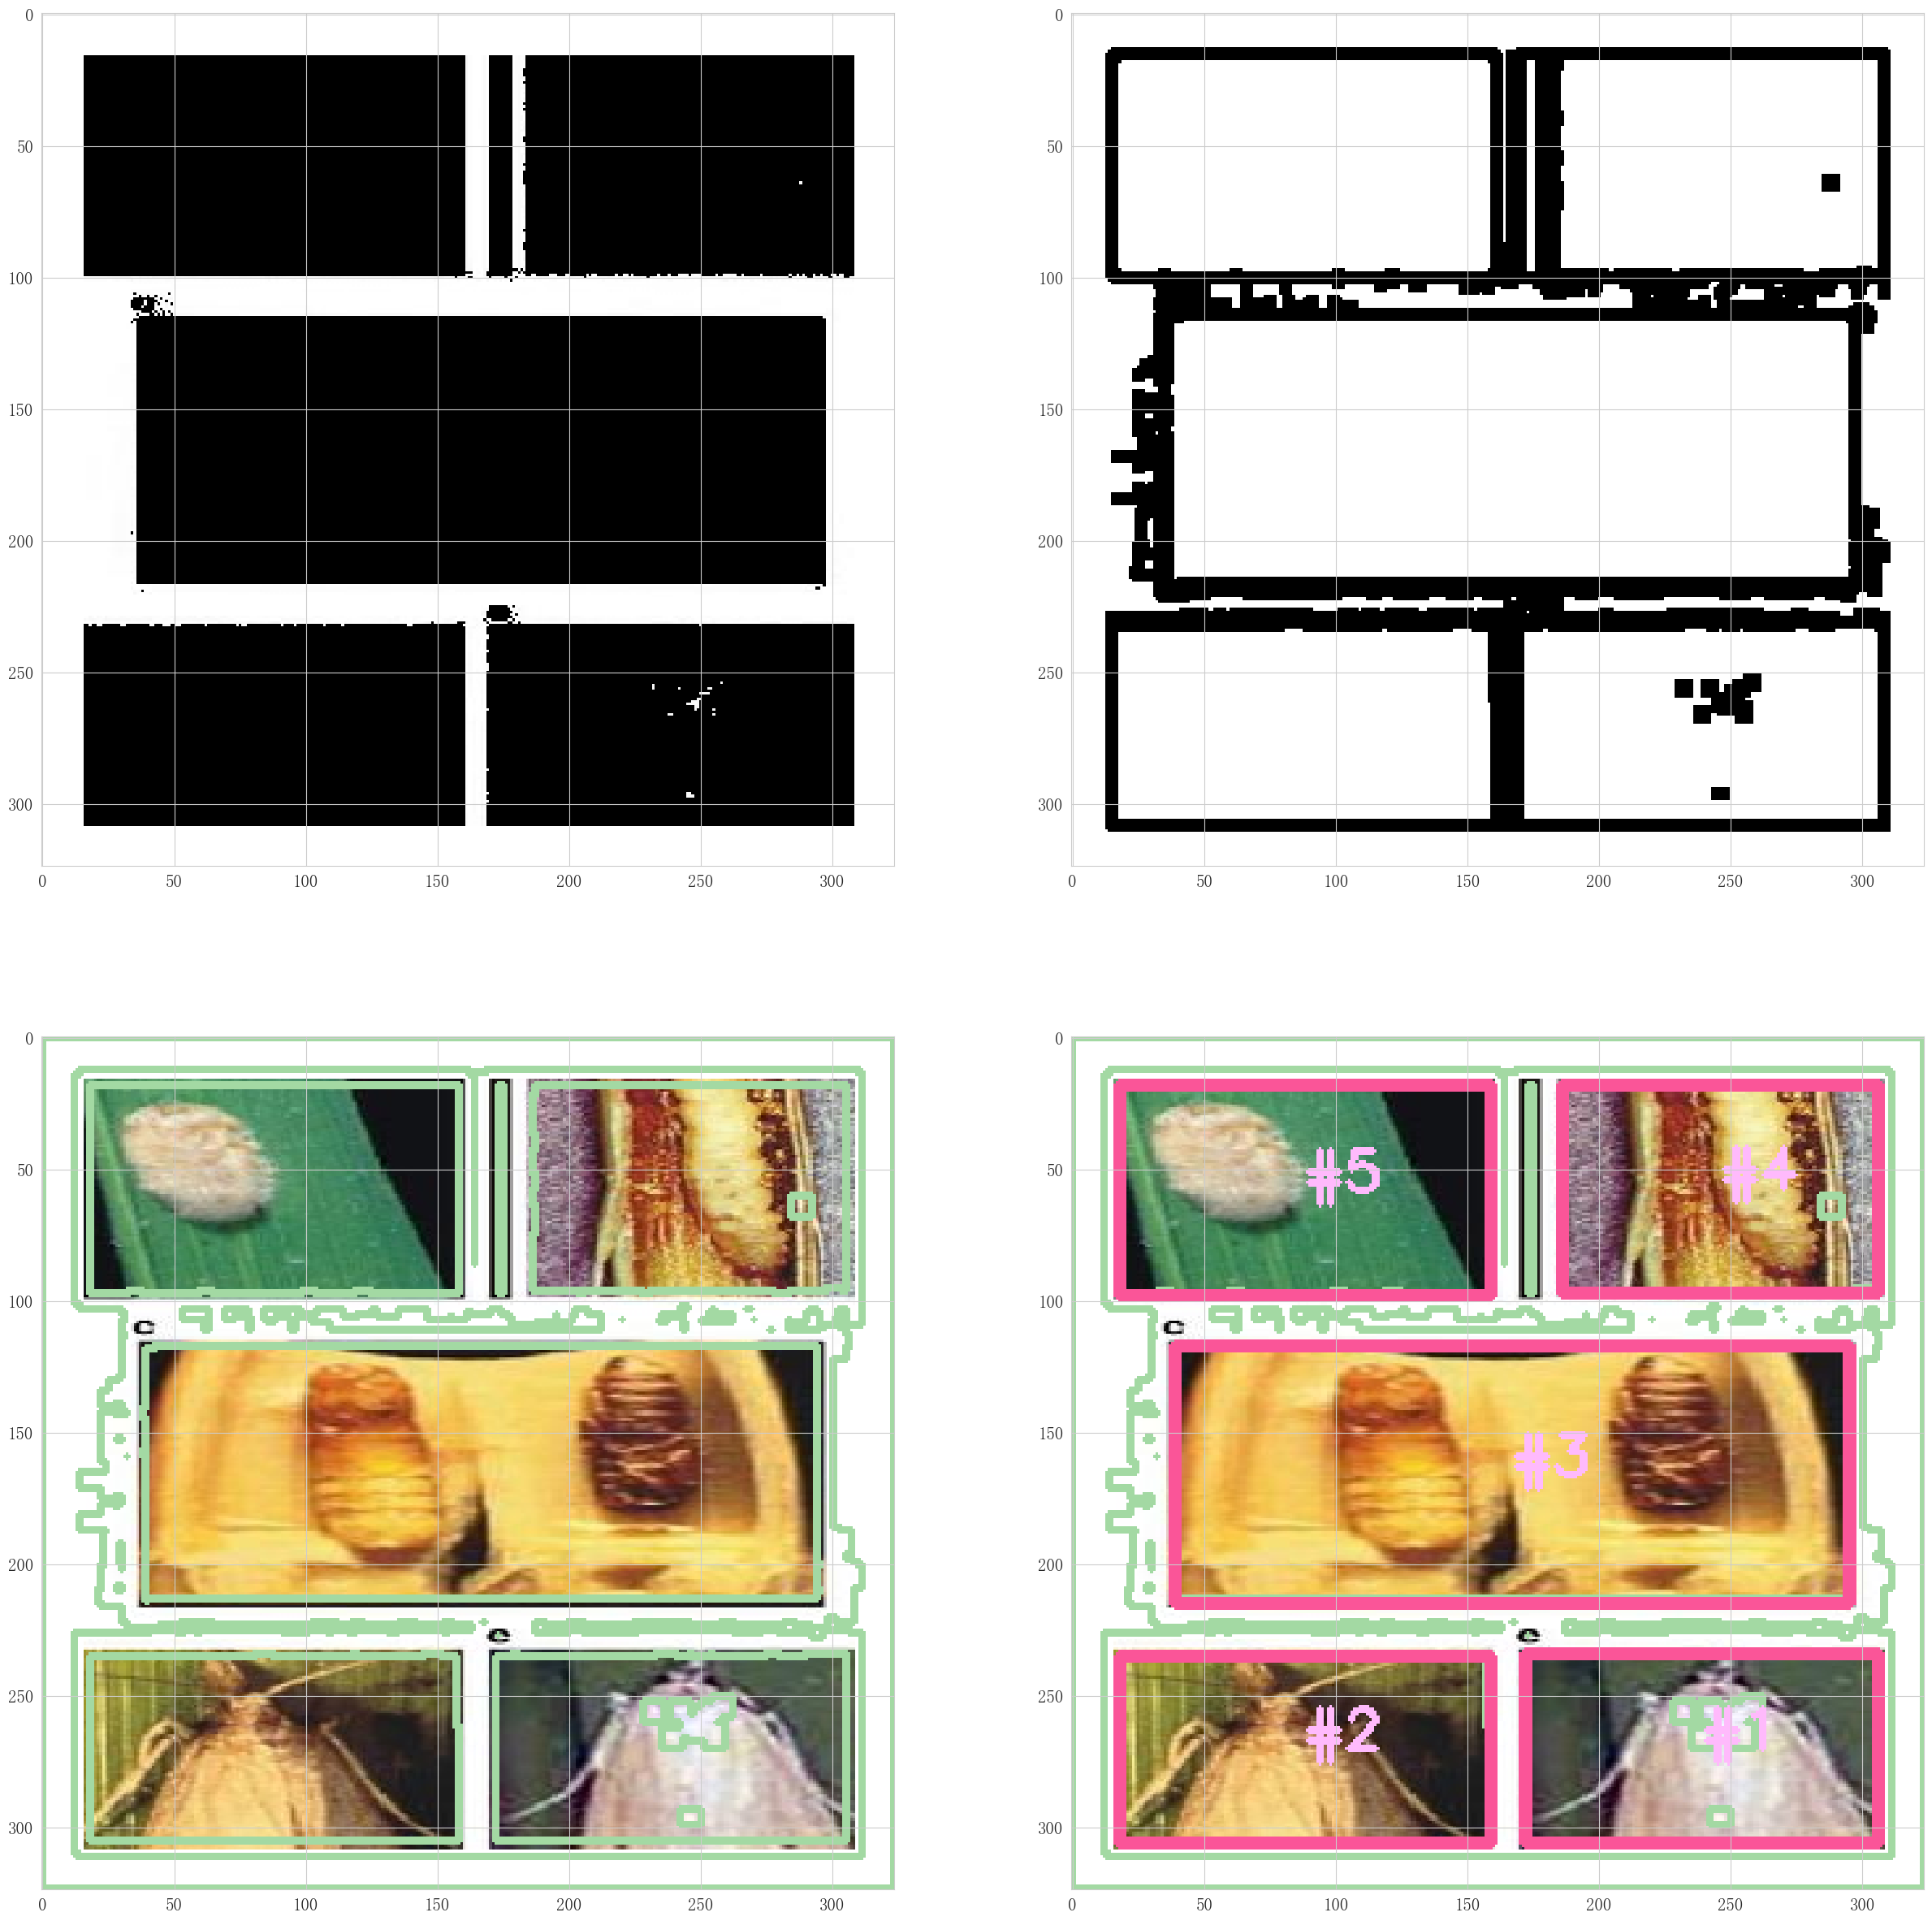

轮廓数量：67
(0, 0, 324, 324)包含(12, 12, 300, 300)
(12, 12, 300, 300)包含(169, 222, 137, 84)
(18, 113, 138, 98)包含(20, 134, 116, 54)
x=169,y=222,w=137,h=84
1：0.15910670837678137
x=18,y=222,w=138,h=84
2：8.62663906142167e-05
x=169,y=114,w=137,h=98
3：0.00029792939073439596
x=20,y=134,w=116,h=54
4：0.116698595146871
x=169,y=18,w=137,h=87
5：0.0002516989680342311
x=18,y=18,w=138,h=86
6：0.0007583417593528817


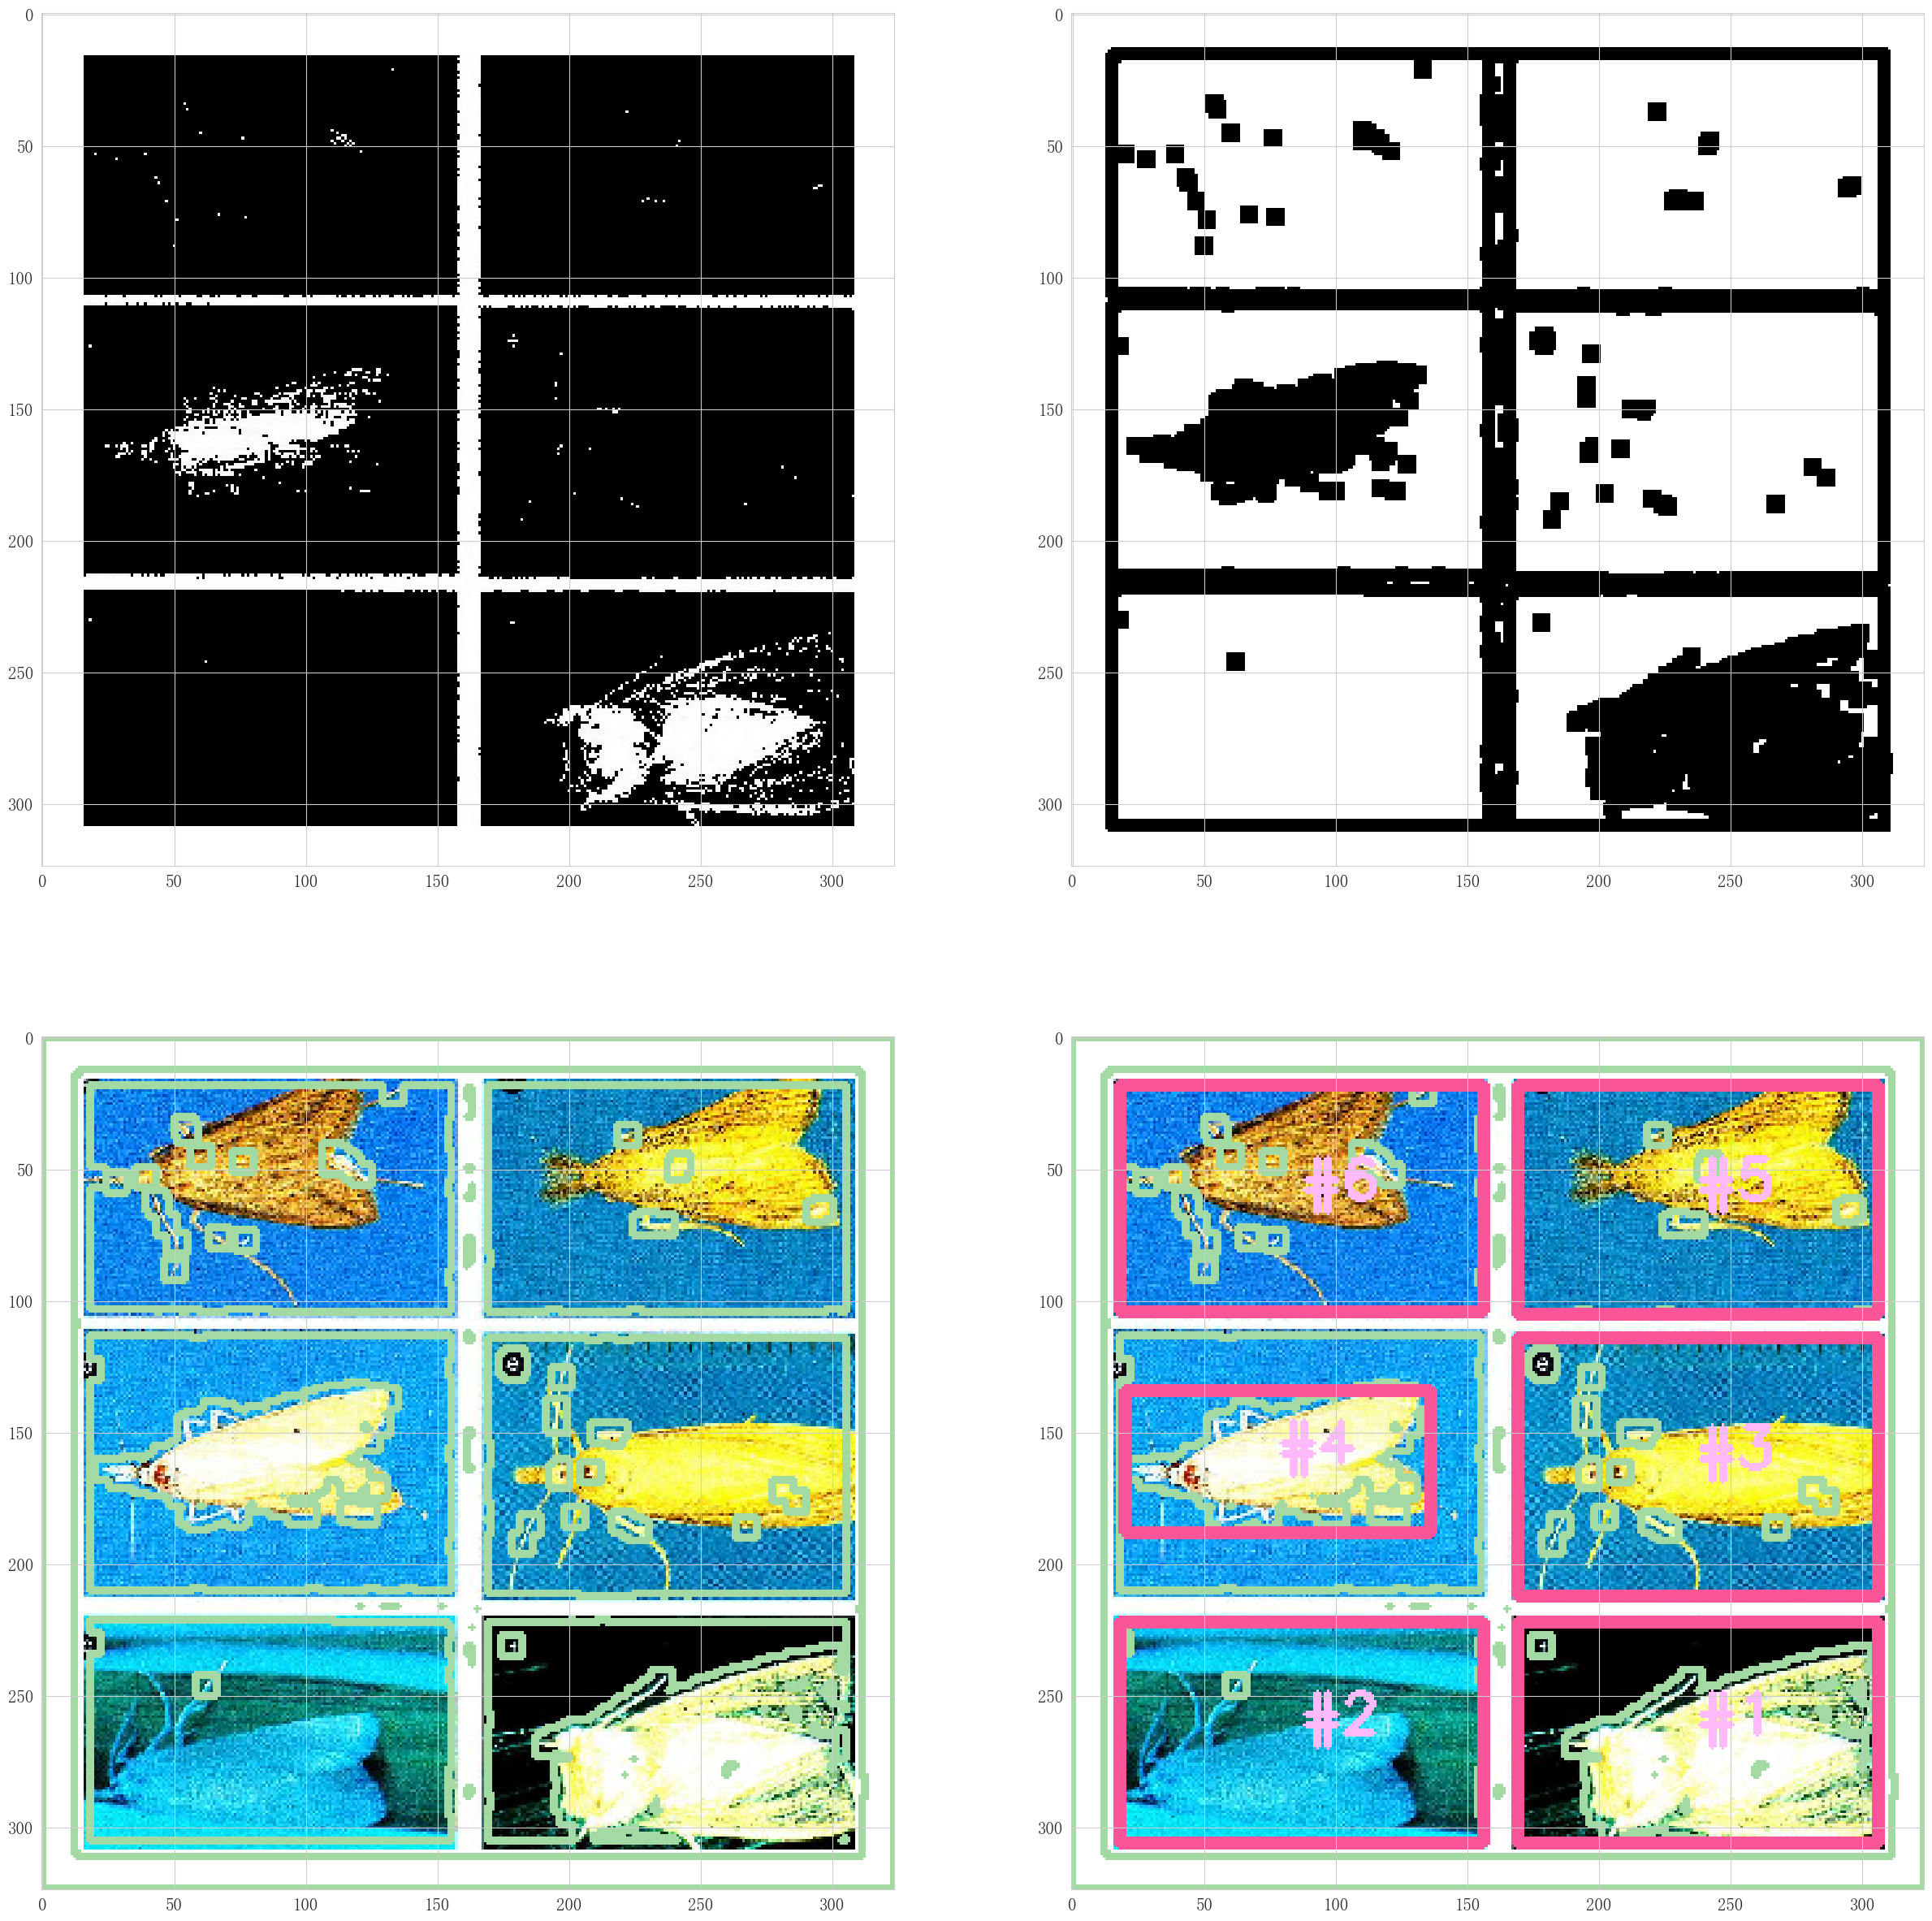

轮廓数量：31
(0, 0, 324, 324)包含(12, 13, 300, 279)
(12, 13, 300, 279)包含(185, 188, 121, 81)
x=185,y=188,w=121,h=81
1：0.2028364452606877
x=18,y=158,w=149,h=112
2：0.0002996164908916587
x=187,y=24,w=119,h=102
3：0.1463997363651343
x=18,y=19,w=146,h=105
4：0.0


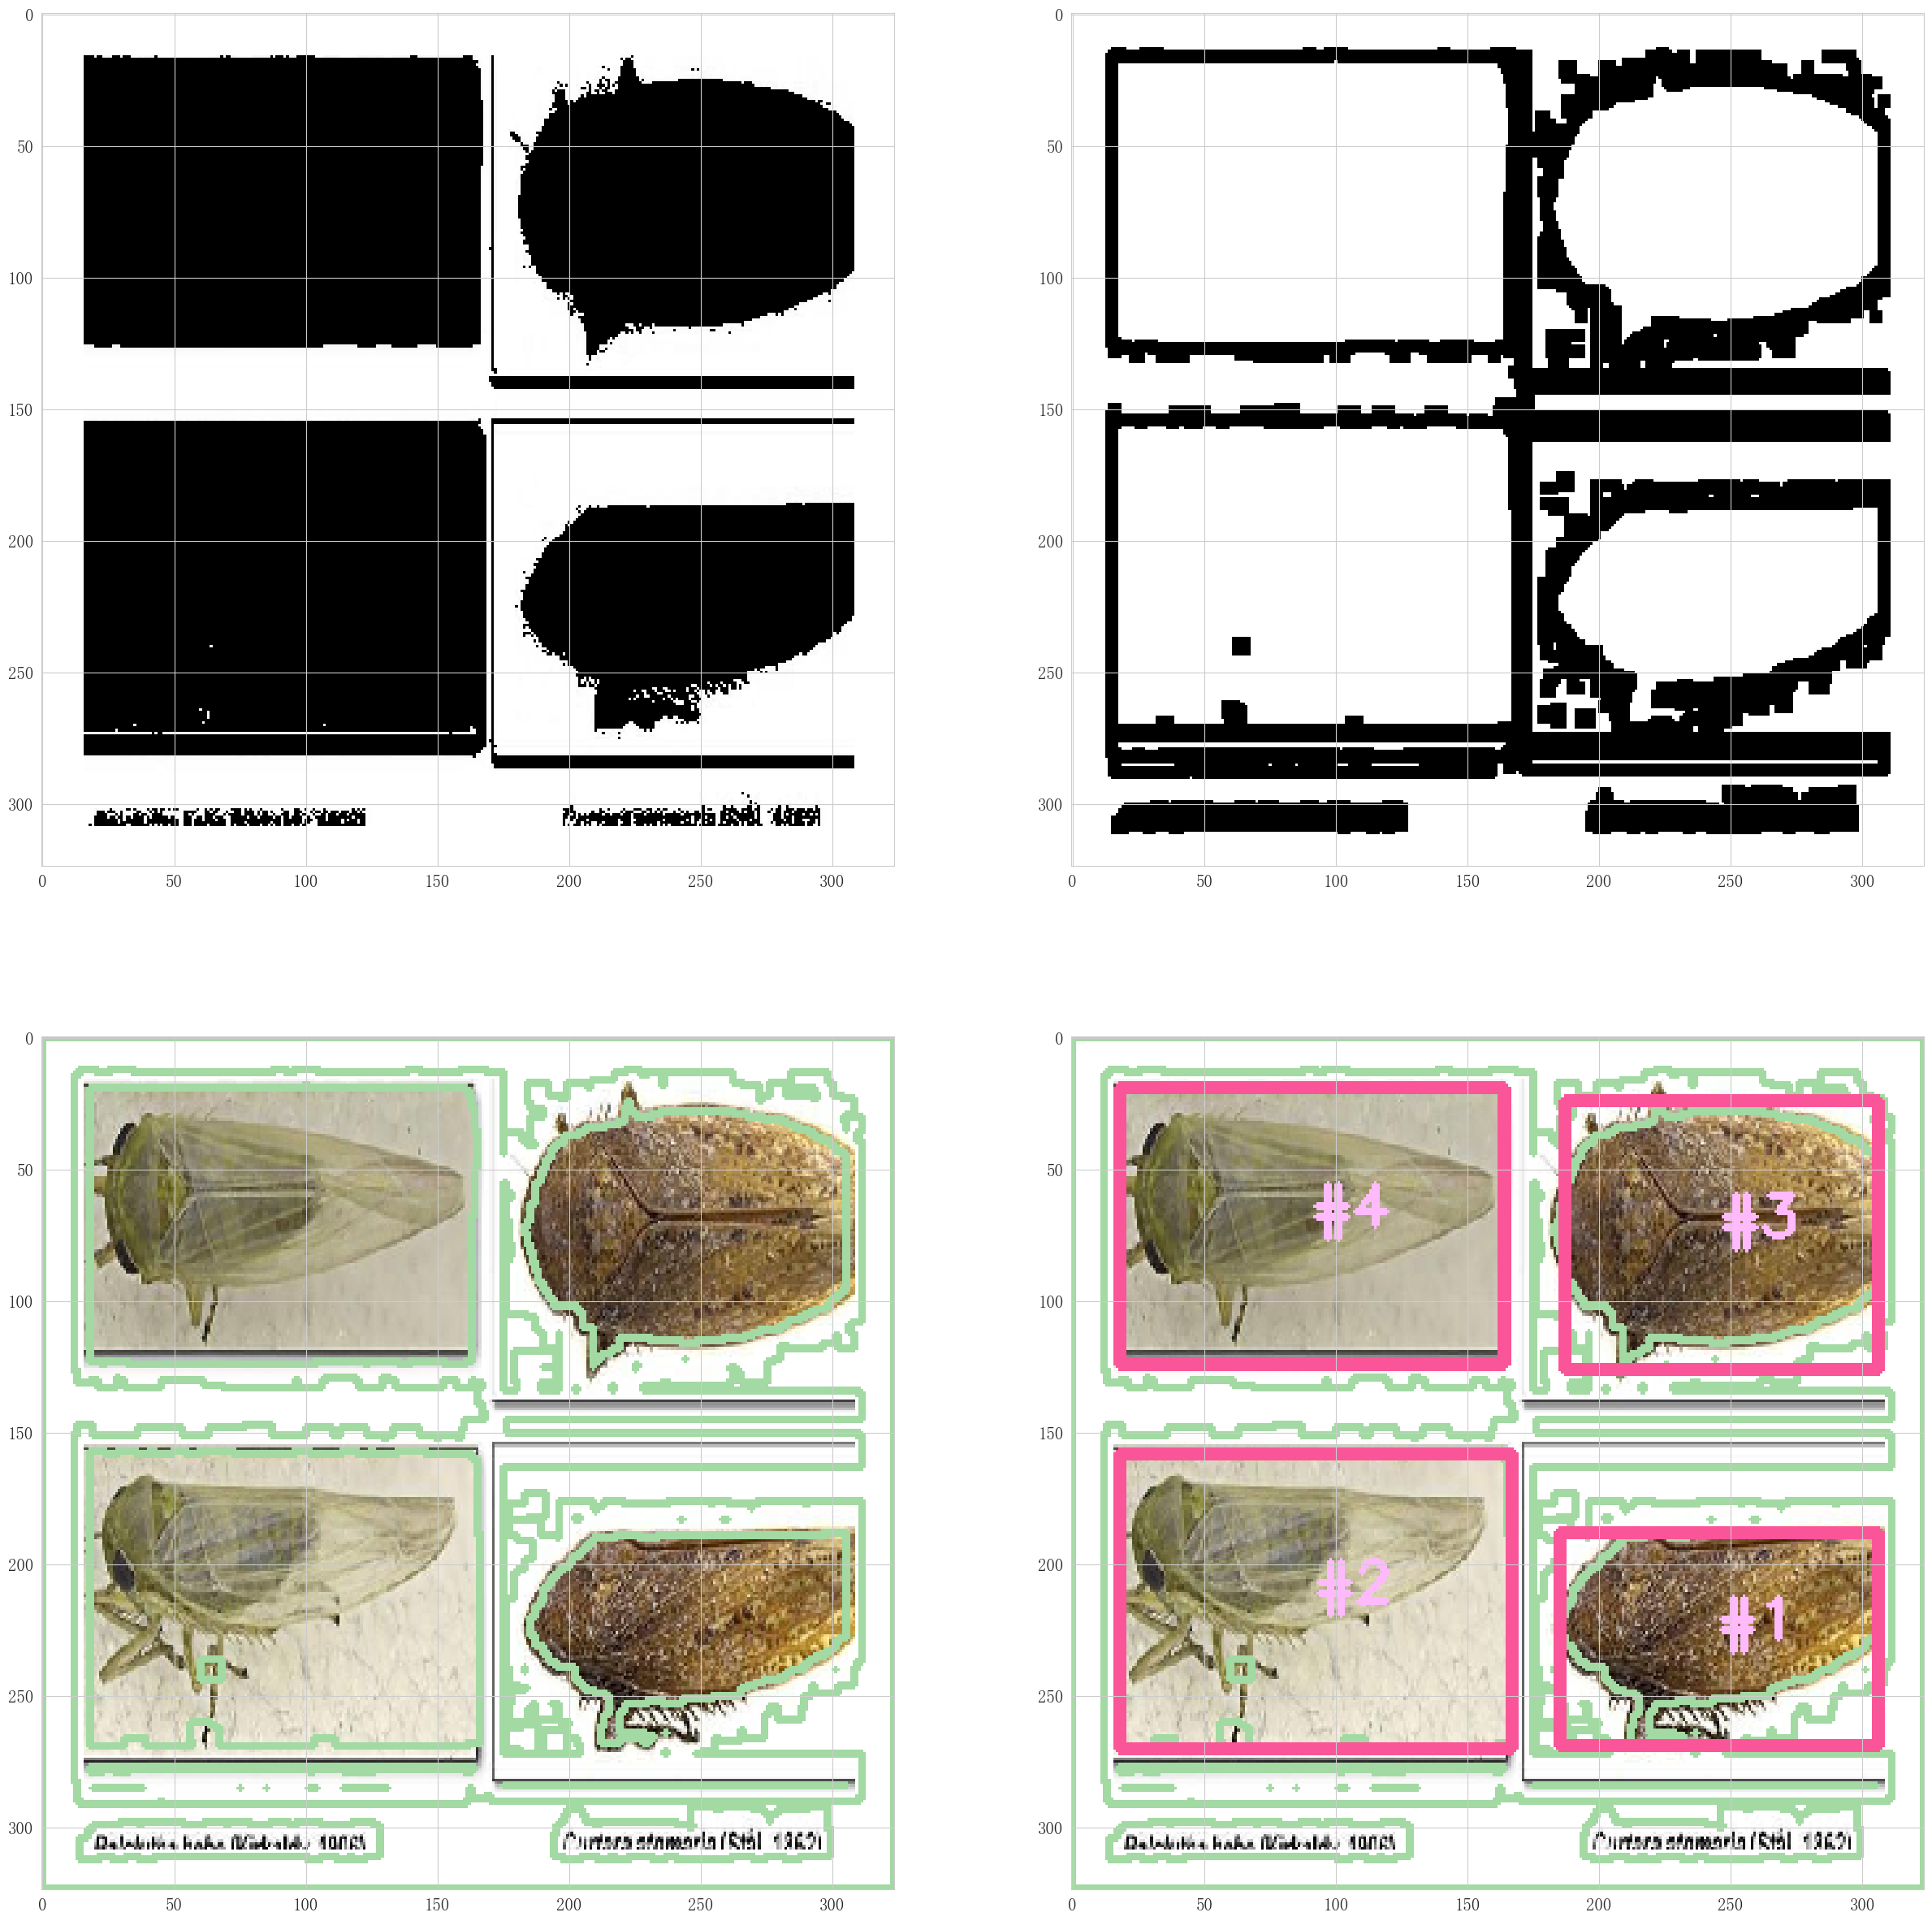

轮廓数量：134
(0, 0, 324, 324)包含(12, 12, 301, 300)
(12, 12, 301, 300)包含(52, 125, 254, 126)
x=52,y=125,w=254,h=126
1：0.0565554305711786


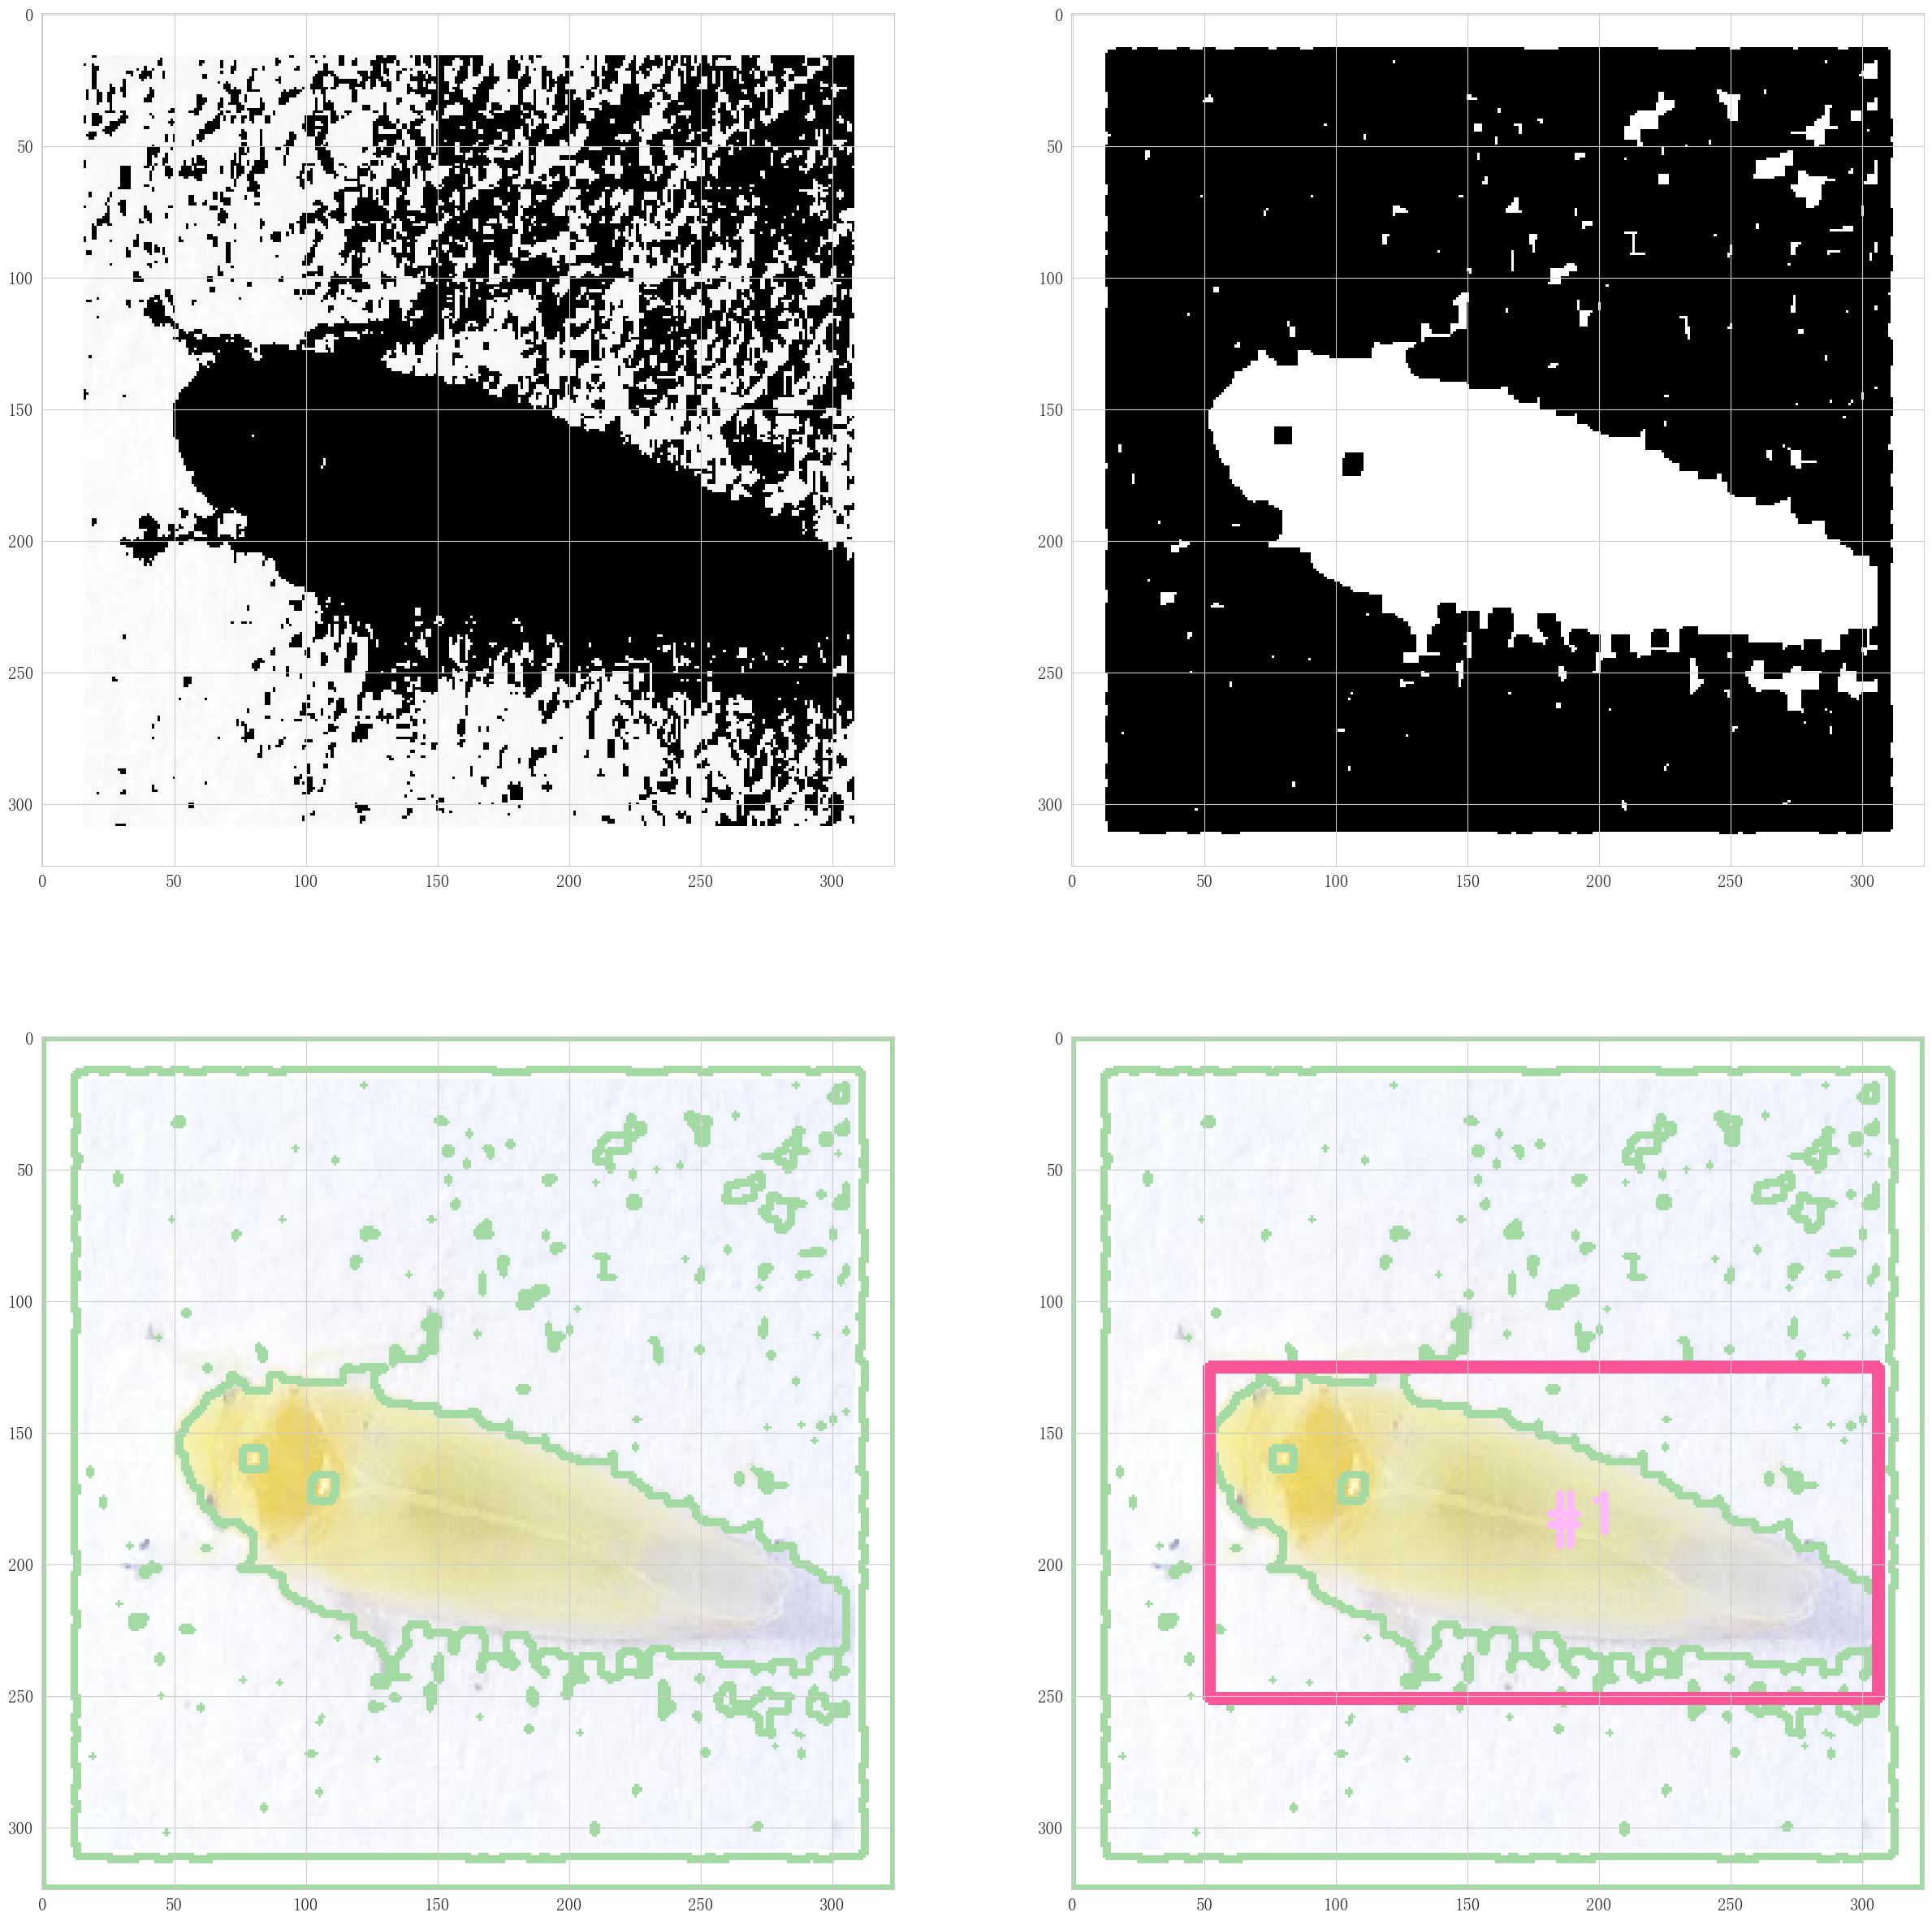

In [35]:
import TranditionalImgCutVision as TICV
import cv2 as cv
for root,dir,files in os.walk("./test_img"):
    for file in files:
        name = os.path.join(root,file)
        img = cv.imread(name)
        name = name.split('/')[-1].split('.')[0]
        squares, img = TICV.find_squares(img,name)
        plt.subplot(2, 2, 4)
        plt.imshow(img[:, :, ::-1])
        plt.show()

# 4 最终预处理后的数据集
我将其存放再了Kaggle中，可以直接进行下载读取
```
!kaggle datasets download -d zbzzcc/ip102yolo
```